# Multilayer perceptron example

This Jupyter notebook has as goal to show the use the Multilayer-perceptron class `mlp.py` provided in this repository. The implementation of the MLP has didactic purposes in other words is not optimized, but well commented. It is mostly based on the lectures for weeks 4 and 5 (neural networks) in the the MOOC [Machine Learning](https://www.coursera.org/learn/machine-learning#%20) taught by from Andrew Ng and notes from the chapter 6 (deep forward networks) from the [Deep Learning](http://www.deeplearningbook.org/).  


In [1]:
%matplotlib notebook
import numpy as np
import pickle, gzip
import mlp
import matplotlib.pyplot as plt
import os
import urllib.request

## 1. Loading dataset
The dataset utilzied for this example can be downloaded from [http://deeplearning.net/data/mnist/mnist.pkl.gz](http://deeplearning.net/data/mnist/mnist.pkl.gz) and consist of a subset (20k examples) of the famous [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). 

In [2]:
# Download MNIST data if needed  
mnist_filename = 'mnist.pkl.gz'
if not os.path.exists(mnist_filename):    
    ulr_mnist = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
    urllib.request.urlretrieve(ulr_mnist, mnist_filename)

# As 'mnist.pkl.gz' was created in Python2, 'latin1' encoding is needed to loaded in Python3
with gzip.open(mnist_filename, 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

The dataset contains 70K examples divided as: 50k for training, 10k for validation and 10k for testing.
Each example is a 28x28 pixel grayimages containing a digit. Some examples of the database:

<IPython.core.display.Javascript object>


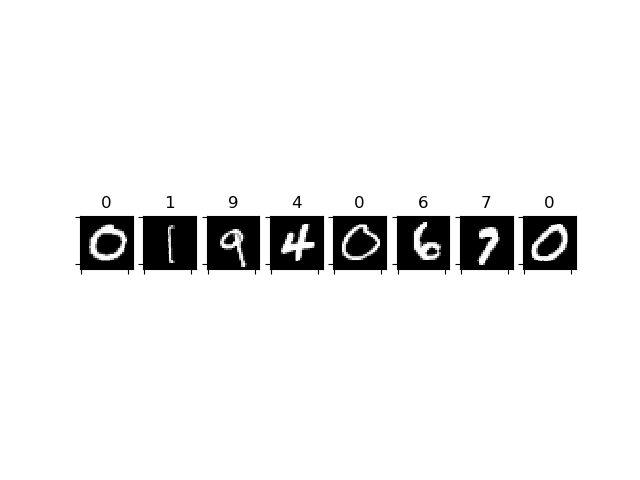

In [3]:
# Plot random examples
examples = np.random.randint(10000, size=8)
n_examples = len(examples)
plt.figure()
for ix_example in range(n_examples):
    tmp = np.reshape(train_set[0][examples[ix_example],:], [28,28])
    ax = plt.subplot(1,n_examples, ix_example + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(train_set[1][examples[ix_example]]))
    plt.imshow(tmp, cmap='gray')

For sake of time, the MLP is trained with the validation set (10K examples); testing is performed with the test set (10K examples)

In [4]:
# Training data
train_X = valid_set[0]
train_y = valid_set[1]  
print('Shape of training set: ' + str(train_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(train_y)
labels = np.unique(train_y)
train_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(train_y == labels[ix_label])[0]
    train_Y[ix_tmp, ix_label] = 1


# Test data
test_X = test_set[0]
test_y = test_set[1] 
print('Shape of test set: ' + str(test_X.shape))

# change y [1D] to Y [2D] sparse array coding class
n_examples = len(test_y)
labels = np.unique(test_y)
test_Y = np.zeros((n_examples, len(labels)))
for ix_label in range(len(labels)):
    # Find examples with with a Label = lables(ix_label)
    ix_tmp = np.where(test_y == labels[ix_label])[0]
    test_Y[ix_tmp, ix_label] = 1


Shape of training set: (10000, 784)
Shape of test set: (10000, 784)


## 2. Parameters of MLP
 * __Number of layers__ : 4 (input, hidden1, hidden2 output)
 * __Elements in layers__ : [784, 25, 10, 10]   
 * __Activation function__ : Rectified Linear function
 * __Regularization parameter__ : 1 

## 3. Creating MLP object 

In [5]:
# Creating the MLP object initialize the weights
mlp_classifier = mlp.Mlp(size_layers = [784, 25, 10, 10], 
                         act_funct   = 'relu',
                         reg_lambda  = 0,
                         bias_flag   = True)
print(mlp_classifier)

## 4. Training MLP object

<IPython.core.display.Javascript object>


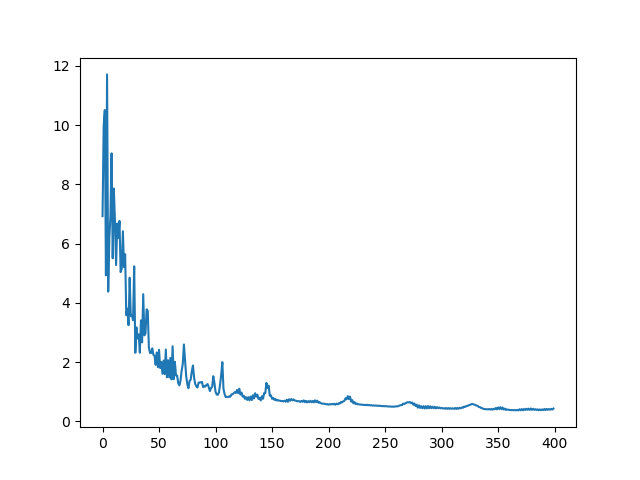

Training Accuracy: 95.64


In [6]:
# Training with Backpropagation and 400 iterations
iterations = 400
loss = np.zeros([iterations,1])

for ix in range(iterations):
    mlp_classifier.train(train_X, train_Y, 1)
    Y_hat = mlp_classifier.predict(train_X)
    y_tmp = np.argmax(Y_hat, axis=1)
    y_hat = labels[y_tmp]
    
    loss[ix] = (0.5)*np.square(y_hat - train_y).mean()

# Ploting loss vs iterations
plt.figure()
ix = np.arange(iterations)
plt.plot(ix, loss)

# Training Accuracy
Y_hat = mlp_classifier.predict(train_X)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

acc = np.mean(1 * (y_hat == train_y))
print('Training Accuracy: ' + str(acc*100))

## 5. Testing MLP

In [7]:
# Test Accuracy
Y_hat = mlp_classifier.predict(test_X)
y_tmp = np.argmax(Y_hat, axis=1)
y_hat = labels[y_tmp]

acc = np.mean(1 * (y_hat == test_y))
print('Testing Accuracy: ' + str(acc*100))  

Testing Accuracy: 92.86999999999999


In [8]:
print(test_X.shape)
ix_example = 1
tmp = np.reshape(test_X[examples[ix_example],:], [28,28])

(10000, 784)


<IPython.core.display.Javascript object>


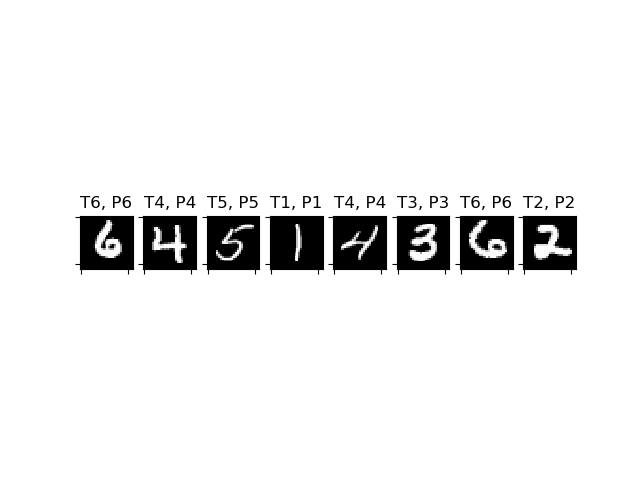

In [9]:
# Some test samples, [T]rue labels and [P]redicted labels
examples = np.random.randint(10000, size=8)
n_examples = len(examples)
plt.figure()
for ix_example in range(n_examples):
    tmp = np.reshape(test_X[examples[ix_example],:], [28,28])
    ax = plt.subplot(1,8, ix_example + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title('T'+ str(test_y[examples[ix_example]]) + ', P' + str(y_hat[examples[ix_example]]))
    plt.imshow(tmp, cmap='gray')
    

## 6.  Plotting some weights
#### A. Weights from Input layer to Hidden layer 1

<IPython.core.display.Javascript object>


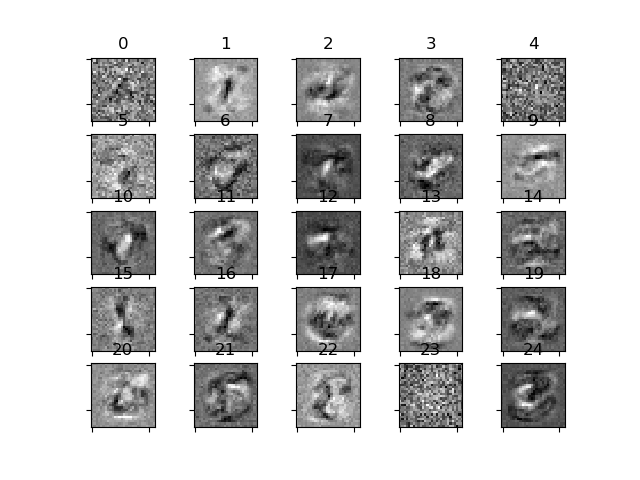

In [10]:
w1 = mlp_classifier.theta_weights[0][:,1:]
plt.figure()
for ix_w in range(25):
    tmp = np.reshape(w1[ix_w,:], [28,28])
    ax = plt.subplot(5,5, ix_w + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(ix_w))
    plt.imshow(1- tmp, cmap='gray')

#### B. Weights from Hidden layer 1 to Hidden layer 2

<IPython.core.display.Javascript object>


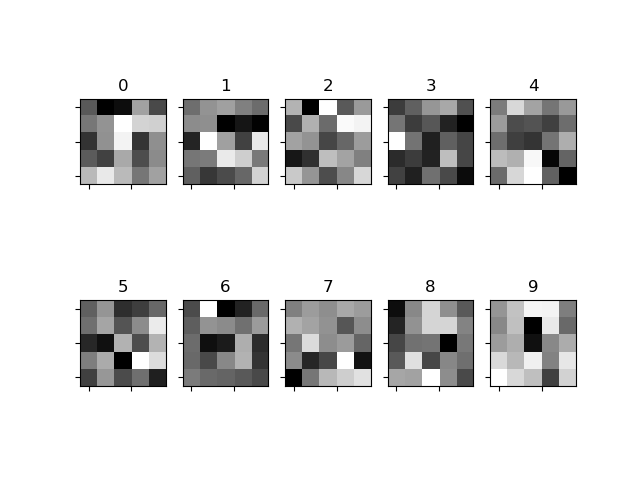

In [11]:
w2 =  mlp_classifier.theta_weights[1][:,1:]
plt.figure()
for ix_w in range(10):
    tmp = np.reshape(w2[ix_w,:], [5,5])
    ax = plt.subplot(2,5, ix_w + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(ix_w))
    plt.imshow(1- tmp, cmap='gray')

#### C. Weights from Hidden layer 2 to Output layer

<IPython.core.display.Javascript object>


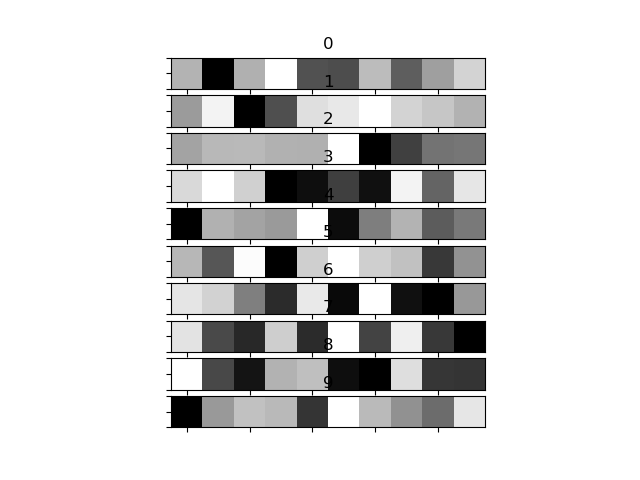

In [12]:
w3 =  mlp_classifier.theta_weights[2][:,1:]
plt.figure()
for ix_w in range(10):
    tmp = np.reshape(w3[ix_w,:], [1,10])
    ax = plt.subplot(10,1, ix_w + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.title(str(ix_w))
    plt.imshow(1- tmp, cmap='gray')